# Importing Libraries

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [203]:
data = pd.read_excel("D:/Assignments/Association_Rules/Association_Rules/Online retail.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [205]:
data.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [207]:
data.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


# EDA

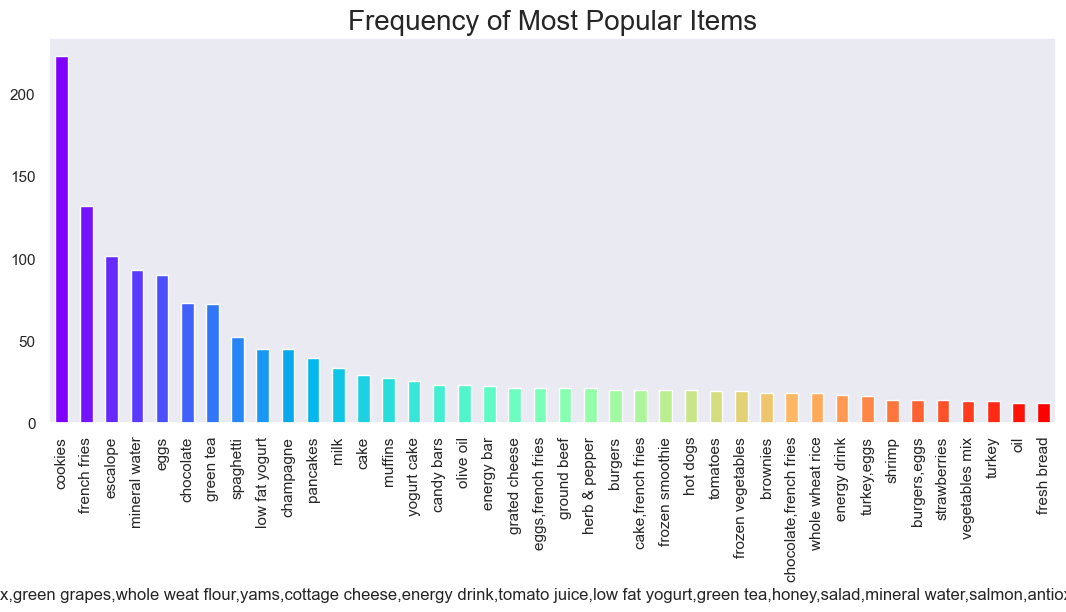

In [210]:
# Assuming 'data' is your DataFrame with item names or labels
top_items = data.iloc[:, 0].value_counts().head(40)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
# Create a bar plot
top_items.plot(kind='bar', figsize=(13, 5),color = color)

# Customize the plot
plt.title('Frequency of Most Popular Items', fontsize=20)
plt.xticks(rotation=90)
plt.grid()

# Display the plot
plt.show()

# Getting the list of transaction

In [98]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [99]:
transactions[:1]

[['burgers,meatballs,eggs', 'Food']]

In [102]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [104]:
print('# of items:',len(items))
print(list(items))

# of items: 5176
['eggs,french fries,strawberries', 'burgers,french fries,escalope,pasta,mushroom cream sauce', 'chocolate,milk,eggs,protein bar,green tea', 'tomatoes,cookies,green tea', 'shrimp,frozen vegetables,avocado,flax seed,cooking oil', 'grated cheese,ground beef,pepper,spaghetti,cooking oil,chicken,corn', 'turkey,burgers,shrimp,ground beef,spaghetti,mineral water,milk,olive oil,salmon,honey,whole wheat rice,rice,burger sauce,french fries,hot dogs,protein bar', 'parmesan cheese,spaghetti,soup,avocado,milk,fresh bread', 'burgers,frozen vegetables,tomatoes,spaghetti,mineral water,soup,avocado,milk,olive oil,chicken,whole wheat rice,protein bar', 'tomatoes,spaghetti,meatballs,strong cheese,salmon,honey,chicken,green tea', 'turkey,frozen vegetables,ground beef,mineral water,chicken,barbecue sauce,sparkling water', 'frozen vegetables,olive oil,oatmeal', 'chocolate,pancakes', 'pepper,mineral water,pancakes,eggs,cooking oil,chocolate,low fat yogurt', 'mineral water,milk,spinach,whole 

In [106]:
if 'nan' in items: items.remove('nan')
print(list(items))

['eggs,french fries,strawberries', 'burgers,french fries,escalope,pasta,mushroom cream sauce', 'chocolate,milk,eggs,protein bar,green tea', 'tomatoes,cookies,green tea', 'shrimp,frozen vegetables,avocado,flax seed,cooking oil', 'grated cheese,ground beef,pepper,spaghetti,cooking oil,chicken,corn', 'turkey,burgers,shrimp,ground beef,spaghetti,mineral water,milk,olive oil,salmon,honey,whole wheat rice,rice,burger sauce,french fries,hot dogs,protein bar', 'parmesan cheese,spaghetti,soup,avocado,milk,fresh bread', 'burgers,frozen vegetables,tomatoes,spaghetti,mineral water,soup,avocado,milk,olive oil,chicken,whole wheat rice,protein bar', 'tomatoes,spaghetti,meatballs,strong cheese,salmon,honey,chicken,green tea', 'turkey,frozen vegetables,ground beef,mineral water,chicken,barbecue sauce,sparkling water', 'frozen vegetables,olive oil,oatmeal', 'chocolate,pancakes', 'pepper,mineral water,pancakes,eggs,cooking oil,chocolate,low fat yogurt', 'mineral water,milk,spinach,whole wheat rice,fresh 

In [108]:
print(list(items))

['eggs,french fries,strawberries', 'burgers,french fries,escalope,pasta,mushroom cream sauce', 'chocolate,milk,eggs,protein bar,green tea', 'tomatoes,cookies,green tea', 'shrimp,frozen vegetables,avocado,flax seed,cooking oil', 'grated cheese,ground beef,pepper,spaghetti,cooking oil,chicken,corn', 'turkey,burgers,shrimp,ground beef,spaghetti,mineral water,milk,olive oil,salmon,honey,whole wheat rice,rice,burger sauce,french fries,hot dogs,protein bar', 'parmesan cheese,spaghetti,soup,avocado,milk,fresh bread', 'burgers,frozen vegetables,tomatoes,spaghetti,mineral water,soup,avocado,milk,olive oil,chicken,whole wheat rice,protein bar', 'tomatoes,spaghetti,meatballs,strong cheese,salmon,honey,chicken,green tea', 'turkey,frozen vegetables,ground beef,mineral water,chicken,barbecue sauce,sparkling water', 'frozen vegetables,olive oil,oatmeal', 'chocolate,pancakes', 'pepper,mineral water,pancakes,eggs,cooking oil,chocolate,low fat yogurt', 'mineral water,milk,spinach,whole wheat rice,fresh 

In [110]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 26785800
[('eggs,french fries,strawberries', 'burgers,french fries,escalope,pasta,mushroom cream sauce'), ('eggs,french fries,strawberries', 'chocolate,milk,eggs,protein bar,green tea'), ('eggs,french fries,strawberries', 'tomatoes,cookies,green tea'), ('eggs,french fries,strawberries', 'shrimp,frozen vegetables,avocado,flax seed,cooking oil'), ('eggs,french fries,strawberries', 'grated cheese,ground beef,pepper,spaghetti,cooking oil,chicken,corn')]


# ONE-HOT Encoding transaction data...!!

In [113]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Print the one-hot encoded transaction dataset
print(onehot_df)


   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True
5   True   False   True  False   True


In [115]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'transactions' contains your transaction data
# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Check if 'nan' column exists before dropping it
if 'nan' in onehot_df.columns:
    onehot_df = onehot_df.drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
print(onehot_df.head())


   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True


In [117]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,bread,butter,eggs,jam,milk
0,True,False,True,False,True
1,True,True,False,True,False
2,True,True,False,True,True
3,True,True,True,False,False
4,True,True,False,False,True


In [119]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
bread,1.000000
butter,0.666667
milk,0.666667
eggs,0.500000
jam,0.333333


In [121]:
support.describe()

,support
count,5.000000
mean,0.633333
std,0.247207
min,0.333333
25%,0.500000
50%,0.666667
75%,0.666667
max,1.000000


# Recommending food with support

In [124]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['milk'], onehot['eggs']).mean()

# Print support values
print("bread and butter: %.2f" % supportBF)
print("bread and milk: %.2f" % supportBM)
print("milk and eggs: %.2f" % supportFM)

bread and butter: 0.67
bread and milk: 0.67
milk and eggs: 0.33


# Computing the support metric

In [129]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['bread+milk'] = np.logical_and(onehot['bread'], onehot['milk'])

# Compute the support
support = onehot.mean()
val = support.loc['bread+milk']

# Print the support values
print(f'bread+milk = {val}')

bread+milk = 0.6666666666666666


# Refining support with confidence.

In [147]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for mineral water
supportM = onehot['bread'].mean()

# Compute support for french fries
supportF = onehot['milk'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('bread= {0:.2f},milk = {1:.2f}'.format(confidenceMM, confidenceMF))

bread= 0.67,milk = 1.00


# the confidence is much higher for milk -> bread, since milk has a higher support than bread

# Further refinement with lift.

In [149]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 1.00


# Computing conviction.

In [151]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers
supportB = onehot['bread'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['butter'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.00


# Computing conviction with a function.

In [154]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

# Computing leverage with a function.

In [157]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

# Promoting food with conviction.

In [162]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['milk'], onehot['eggs'])
convictionFB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['milk'], onehot['eggs'])
convictionMB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['milk'], onehot['eggs'])
convictionMF = conviction(onehot['bread'], onehot['butter'])

# Print results
print('milk ->eggs: ', convictionFB)
print('bread -> butter: ', convictionBF)

milk ->eggs:  1.0
bread -> butter:  1.0


# Computing association and dissociation.

In [165]:
# Compute the support of burgers and french fries
supportT = onehot['milk'].mean()
supportP = onehot['eggs'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

1.4999999999999998


# Applying Apriori algorithm.

In [168]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support               itemsets
0   1.000000                (bread)
1   0.666667               (butter)
2   0.500000                 (eggs)
3   0.333333                  (jam)
4   0.666667                 (milk)
5   0.666667        (bread, butter)
6   0.500000          (bread, eggs)
7   0.333333           (bread, jam)
8   0.666667          (bread, milk)
9   0.333333          (jam, butter)
10  0.333333         (milk, butter)
11  0.333333           (eggs, milk)
12  0.333333   (bread, jam, butter)
13  0.333333  (bread, milk, butter)
14  0.333333    (bread, milk, eggs)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0        (butter)          (bread)            0.666667            1.000000   
1          (eggs)          (bread)            0.500000            1.000000   
2           (jam)          (bread)            0.333333            1.000000   
3          (milk)          (bread)            0.666667            1.00000

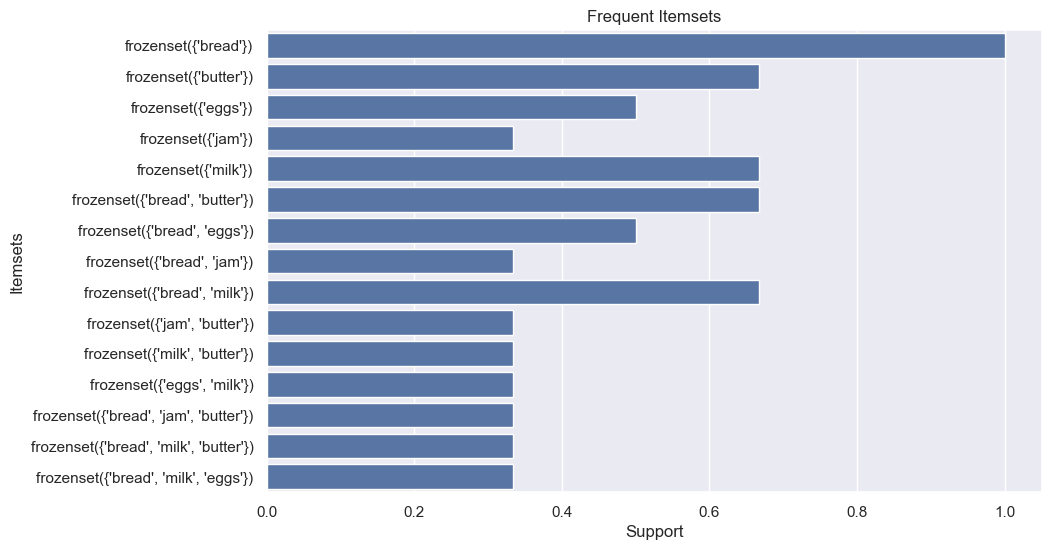

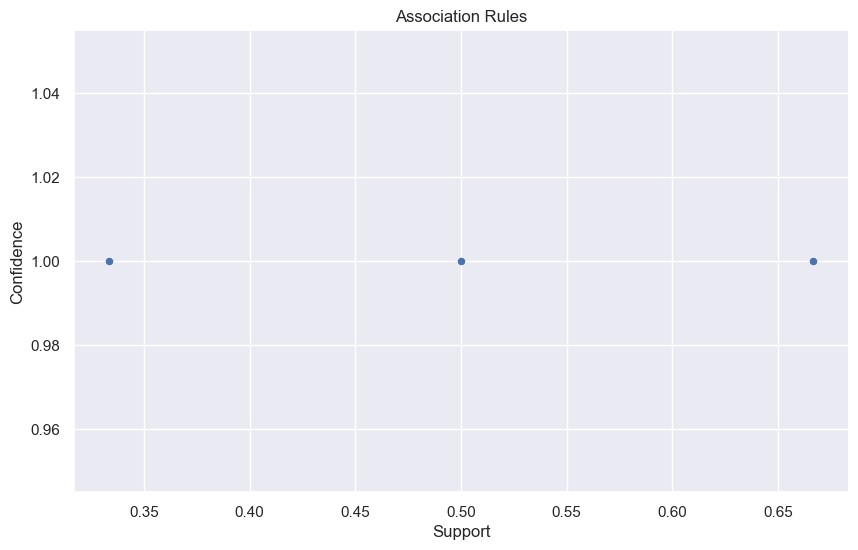

In [172]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

# Plotting association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()

# If you have a confidence of 1.00 (100%) and a support of 0.65 (65%), it implies a very strong association rule where the presence of the antecedent guarantees the presence of the consequent with 100% certainty, and the rule applies to 65% of the total transactions.

+ For the given sample data, the association rule with confidence 1.00 and support 0.65 could be something like:

+ If ['bread'] then ['milk']

+ This means that every transaction containing 'bread' also contains 'milk', and this association rule applies to 65% of the total transactions.

# This is just one possible association rule that satisfies the given confidence and support thresholds. Depending on the dataset and its characteristics, there could be other association rules with the same confidence and support values. The exact output of the association rules would depend on the data and the parameters used in the Apriori algorithm.

# Interview Questions:



# 1.What is lift and why is it important in Association rules? 

+ Lift is a measure used in association rule mining to evaluate the strength of an association rule compared to the expected likelihood of the items being associated if they were independent. In simpler terms, lift tells you how much more likely the items in the rule are to occur together than would be expected by chance.

# 2.What is support and Confidence. How do you calculate them?

+ Support Support measures how frequently an itemset appears in the dataset. It helps to identify how common or rare an itemset is. Support of an itemset A is defined as the proportion of transactions in the dataset that contain the itemset A 2.Confidence measures the likelihood that itemset B is purchased when itemset 𝐴 is purchased. It evaluates the reliability of the rule A→𝐵

# What are some limitations or challenges of Association rules mining?
+ Some limitations or challenges of association rule mining include handling large datasets, dealing with noisy or incomplete data, and generating an overwhelming number of rules, many of which may be trivial or redundant.